In [1]:
# IMPORT PACKAGES AND MODULES

import pandas as pd
import glob
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

## Read Data For Names 

In [3]:
path = r'/Users/gaurikulkarni/Downloads/names' 
all_files = glob.glob(path + "/yob*.txt")

## Read Data for COVID-19

In [4]:
# COVID-19 Confimred cases

covid_confirmed_data = pd.read_csv(r'/Users/gaurikulkarni/Downloads/covid-19/covid_confirmed_usafacts.csv')

In [5]:
# COVID-19 Death cases

covid_death_data = pd.read_csv(r'/Users/gaurikulkarni/Downloads/covid-19/covid_deaths_usafacts.csv')

In [6]:
# COVID-19 Population cases

covid_population_data = pd.read_csv(r'/Users/gaurikulkarni/Downloads/covid-19/covid_county_population_usafacts.csv')

## Melt Confirmed and Death cases data 

In [7]:
# Melt the dateframe into the right shape and set index for confirmed cases
# Reference: https://towardsdatascience.com/analyzing-coronavirus-covid-19-data-using-pandas-and-plotly-2e34fe2c4edc

def cleanconfirmdata(df_raw):
    df_cleaned = df_raw.melt(id_vars=['countyFIPS','County Name','State','stateFIPS'],value_name='Cases',var_name='Date')
    df_cleaned = df_cleaned.set_index(['State','County Name','countyFIPS','State','stateFIPS','Date'])
    return df_cleaned 

# Clean all datasets
confirmed_cases = cleanconfirmdata(covid_confirmed_data)
confirmed_cases

Cases
State County Name           countyFIPS State stateFIPS Date            
AL    Statewide Unallocated 0          AL    1         1/22/2020      0
      Autauga County        1001       AL    1         1/22/2020      0
      Baldwin County        1003       AL    1         1/22/2020      0
      Barbour County        1005       AL    1         1/22/2020      0
      Bibb County           1007       AL    1         1/22/2020      0
...                                                                 ...
WY    Sweetwater County     56037      WY    56        4/6/2020       5
      Teton County          56039      WY    56        4/6/2020      40
      Uinta County          56041      WY    56        4/6/2020       3
      Washakie County       56043      WY    56        4/6/2020       4
      Weston County         56045      WY    56        4/6/2020       0

[242820 rows x 1 columns]

In [8]:
# Melt the dateframe into the right shape and set index for death data
# Reference: https://towardsdatascience.com/analyzing-coronavirus-covid-19-data-using-pandas-and-plotly-2e34fe2c4edc

def cleandeathdata(df_raw):
    df_cleaned = df_raw.melt(id_vars=['countyFIPS','County Name','State','stateFIPS'],value_name='Cases',var_name='Date')
    df_cleaned = df_cleaned.set_index(['State','County Name','countyFIPS','State','stateFIPS','Date'])
    return df_cleaned 

# Clean all datasets
death_cases = cleandeathdata(covid_death_data)
death_cases

Cases
State County Name           countyFIPS State stateFIPS Date            
AL    Statewide Unallocated 0          AL    1         1/22/2020    0.0
      Autauga County        1001       AL    1         1/22/2020    0.0
      Baldwin County        1003       AL    1         1/22/2020    0.0
      Barbour County        1005       AL    1         1/22/2020    0.0
      Bibb County           1007       AL    1         1/22/2020    0.0
...                                                                 ...
WY    Teton County          56039      WY    56        4/6/2020     0.0
      Uinta County          56041      WY    56        4/6/2020     0.0
      Washakie County       56043      WY    56        4/6/2020     0.0
      Weston County         56045      WY    56        4/6/2020     0.0
                                                       4/6/2020     NaN

[242896 rows x 1 columns]

## 1. Compute the total confirmed cases per day in the country.Produce a table and a line plot.

Explanation: For confirmed cases per day, we have to take each day count which will show the total confirmed cases for that individual day.

,COVID-19 Date,Total Confirmed Cases Per Day
0,2020-01-22,1
1,2020-01-23,1
2,2020-01-24,2
3,2020-01-25,2
4,2020-01-26,5
...,...,...
71,2020-04-02,241643
72,2020-04-03,276889
73,2020-04-04,310597
74,2020-04-05,335338


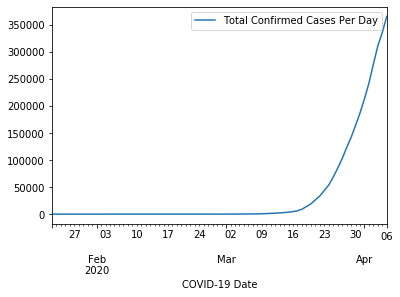

In [9]:
# Get total confirmed cases per day

def confirmedData(df_data):
    df_confirmed = df_data.groupby(['Date'])['Cases'].sum()
    return df_confirmed

confirmed_cases_data = confirmedData(confirmed_cases)

confirmed_cases_data = pd.DataFrame(confirmed_cases_data).reset_index()
confirmed_cases_data.columns = ['COVID-19 Date','Total Confirmed Cases Per Day']
confirmed_cases_data['COVID-19 Date'] = pd.to_datetime(confirmed_cases_data['COVID-19 Date'])
confirmed_cases_data = confirmed_cases_data.sort_values(by="COVID-19 Date")

confirmed_cases_data.plot.line(x='COVID-19 Date',y='Total Confirmed Cases Per Day')

confirmed_cases_data

## 2. Compute the total confirmed cases per week in the country

Explanation: For confirmed cases per week, we have to take each week count, in the given code taking first 5 days as a week and then taking 7 days as a each week.

,Week Date,Total Confirmed Cases Per Week
0,2020-01-27,9
1,2020-02-03,11
2,2020-02-10,11
3,2020-02-17,13
4,2020-02-24,15
5,2020-03-02,53
6,2020-03-09,727
7,2020-03-16,4602
8,2020-03-23,43544
9,2020-03-30,163487


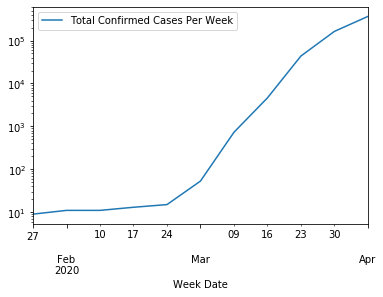

In [10]:
confirm_per_week = confirmed_cases_data[5::7]
confirm_per_week = pd.DataFrame(confirm_per_week).reset_index(drop=True)
confirm_per_week.columns = ['Week Date','Total Confirmed Cases Per Week']

confirm_per_week.plot(x='Week Date',y='Total Confirmed Cases Per Week',logy=True)

confirm_per_week

#### Analysis: As per the Total confirmed cases per week data we can observe that, the cases are exponentially rising.

## 3. Compute the number of new confirmed cases per week in the the country.

Explanation: For new confirmed cases per week, subtracting each week from previous week to get new confirmed case count for that week

In [11]:
confirm_per_week['New Cases Per Week'] = confirm_per_week['Total Confirmed Cases Per Week'].diff().fillna(confirm_per_week['Total Confirmed Cases Per Week'])
confirm_per_week

,Week Date,Total Confirmed Cases Per Week,New Cases Per Week
0,2020-01-27,9,9.0
1,2020-02-03,11,2.0
2,2020-02-10,11,0.0
3,2020-02-17,13,2.0
4,2020-02-24,15,2.0
5,2020-03-02,53,38.0
6,2020-03-09,727,674.0
7,2020-03-16,4602,3875.0
8,2020-03-23,43544,38942.0
9,2020-03-30,163487,119943.0


## 4. Repeat 2 with the number of known deaths Per week count

Explanation: For death cases per week, we have to take each week count, first take each day death count then finding per week death count, for that taking first 5 days as a week and then 7 days as a each week

In [12]:
def deathData(df_data):
    df_death = df_data.groupby(['Date'])['Cases'].sum()
    return df_death

death_cases_data = deathData(death_cases)
death_cases_data = pd.DataFrame(death_cases_data).reset_index()
death_cases_data.columns = ['COVID-19 Date','Total Death Cases Per day']
death_cases_data['COVID-19 Date'] = pd.to_datetime(death_cases_data['COVID-19 Date'])
death_cases_data = death_cases_data.sort_values('COVID-19 Date')
death_cases_data

,COVID-19 Date,Total Death Cases Per day
0,2020-01-22,0.0
1,2020-01-23,0.0
2,2020-01-24,0.0
3,2020-01-25,0.0
4,2020-01-26,0.0
...,...,...
71,2020-04-02,5874.0
72,2020-04-03,7049.0
73,2020-04-04,8236.0
74,2020-04-05,9547.0


,Week Date,Total Death Cases Per Week
0,2020-01-27,0.0
1,2020-02-03,0.0
2,2020-02-10,0.0
3,2020-02-17,0.0
4,2020-02-24,0.0
5,2020-03-02,6.0
6,2020-03-09,28.0
7,2020-03-16,96.0
8,2020-03-23,547.0
9,2020-03-30,3003.0


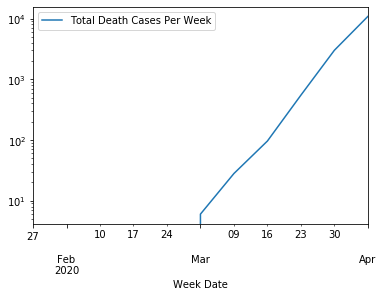

In [13]:
death_per_week = death_cases_data[5::7]
death_per_week = pd.DataFrame(death_per_week).reset_index(drop=True)
death_per_week.columns = ['Week Date','Total Death Cases Per Week']

death_per_week.plot(x='Week Date',y='Total Death Cases Per Week',logy=True)

death_per_week

#### Analysis: As per the Total death cases per week data we can observe that, the cases are exponentially rising.

## 5. Find the 10 counties with the most known number of covid-19 cases. Plot the number of cases each week.

Explanation: For most known cases, first finding each day know cases count, then applying nlargest on data to get 10 counties with heighest count, then find each week count for 10 counties with most known cases

In [14]:
def confirmWeekData(df_raw):
    df_cleaned = df_raw.melt(id_vars=['State','countyFIPS','County Name','stateFIPS'],value_name='Cases',var_name='Date')
    df_cleaned = df_cleaned.set_index(['State','countyFIPS','County Name','stateFIPS','Date'])
    return df_cleaned 

# Clean all datasets
confirm_countyName = confirmWeekData(covid_confirmed_data)
confirm_countyName

max_county = confirm_countyName.groupby(['State','countyFIPS','County Name'])['Cases'].max().reset_index()
max_county = max_county.sort_values('State')
max_county

,State,countyFIPS,County Name,Cases
0,AK,0,Statewide Unallocated,6
30,AK,2290,Yukon-Koyukuk Census Area,1
29,AK,2282,Yakutat City and Borough,0
28,AK,2275,Wrangell City and Borough,0
27,AK,2270,Wade Hampton Census Area,0
...,...,...,...,...
3172,WY,56001,Albany County,4
3171,WY,0,Statewide Unallocated,0
3193,WY,56043,Washakie County,4
3181,WY,56019,Johnson County,8


In [15]:
max_county_data = max_county.nlargest(10, ['Cases'])
max_county_data

,State,countyFIPS,County Name,Cases
2058,NY,36081,Queens County,23133
2041,NY,36047,Kings County,19702
2047,NY,36059,Nassau County,15616
2020,NY,36005,Bronx County,14327
2077,NY,36119,Westchester County,14294
2069,NY,36103,Suffolk County,13487
2048,NY,36061,New York County,10440
725,IL,17031,Cook County,8728
1336,MI,26163,Wayne County,8270
1944,NJ,34003,Bergen County,6862


In [16]:
max_data_list = list(max_county_data['countyFIPS'])

def countyConfirmdata(df_raw):
    df_cleaned = df_raw.melt(id_vars=['State','countyFIPS','County Name','stateFIPS'],value_name='Cases',var_name='Date')
    df_cleaned = df_cleaned.set_index(['State','countyFIPS','County Name','stateFIPS','Date'])
    return df_cleaned 

# Clean all datasets
county_data = countyConfirmdata(covid_confirmed_data)
county_data

county_data_inmax = county_data.groupby(['State','countyFIPS','County Name','Date'])['Cases'].max().reset_index()
county_data_inmax['Date'] = pd.to_datetime(county_data_inmax['Date'])
county_data_inmax = county_data_inmax.sort_values(['County Name','Date'])

county_data_inmax = county_data_inmax[county_data_inmax['countyFIPS'].isin(max_data_list)]
result_list = []

for countyId in max_data_list:
    df_result = county_data_inmax[county_data_inmax['countyFIPS'] == countyId]
    result_list.append(df_result[5::7])

max_county_week = pd.concat(result_list,axis=0,ignore_index=True,sort=False)
max_county_week

,State,countyFIPS,County Name,Date,Cases
0,NY,36081,Queens County,2020-01-27,0
1,NY,36081,Queens County,2020-02-03,0
2,NY,36081,Queens County,2020-02-10,0
3,NY,36081,Queens County,2020-02-17,0
4,NY,36081,Queens County,2020-02-24,0
...,...,...,...,...,...
105,NJ,34003,Bergen County,2020-03-09,7
106,NJ,34003,Bergen County,2020-03-16,61
107,NJ,34003,Bergen County,2020-03-23,609
108,NJ,34003,Bergen County,2020-03-30,2482


In [17]:
new_df_data = max_county_week.pivot(index='Date',columns='County Name',values='Cases')
new_df_data

County Name,Bergen County,Bronx County,Cook County,Kings County,Nassau County,New York County,Queens County,Suffolk County,Wayne County,Westchester County
Date,,,,,,,,,,
2020-01-27,0,0,1,0,0,0,0,0,0,0
2020-02-03,0,0,2,0,0,0,0,0,0,0
2020-02-10,0,0,2,0,0,0,0,0,0,0
2020-02-17,0,0,2,0,0,0,0,0,0,0
2020-02-24,0,0,2,0,0,0,0,0,0,0
2020-03-02,0,0,4,0,0,1,0,0,0,0
2020-03-09,7,2,11,4,19,11,2,1,0,98
2020-03-16,61,34,77,62,109,111,118,63,14,220
2020-03-23,609,1829,922,3494,2442,2572,3621,1458,638,2894


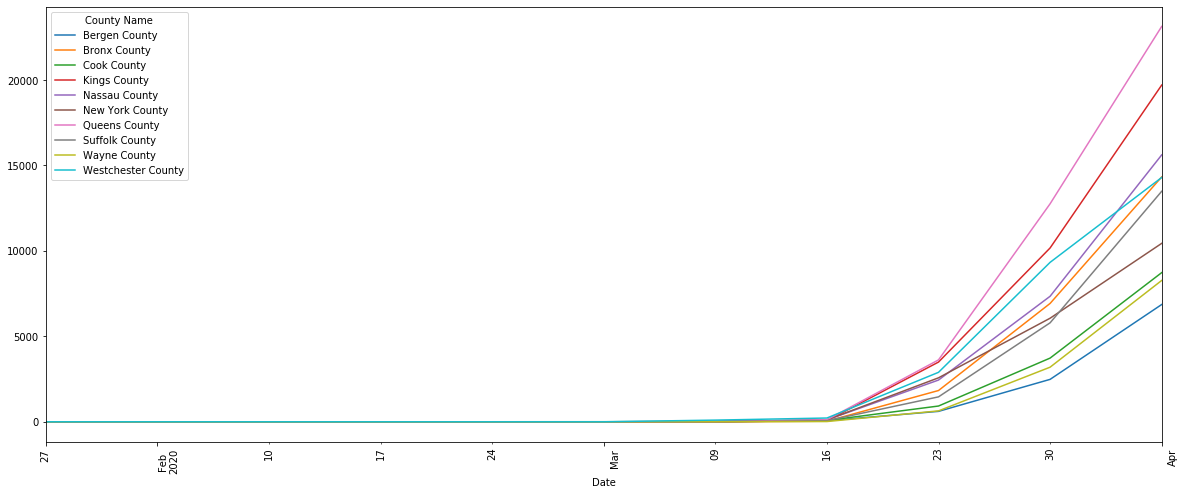

In [18]:
new_df_data.plot(kind='line',rot=90,figsize=(20,8))

#### Analysis: 
Similarities 1) All counties have negligible counts till 2020-03-02 
             2) All counties are showing an increasing trend week over week
             
Differences  1) NY County and Westchester County shows slower growth in number of cases than rest of counties  

## 6. Compute the number of known cases per population in each county that have cases of covid-19.

Explanation: For known cases per population in each county, first we merged population and confirmed cases data and then apply formula to get Per 1M Population Known Cases. Then find 10 counties with heighest vakue and 10 counties with smallest values(not considering population is 0 and per population count is 0)

In [19]:
def confirmCasesData(df_raw):
    df_cleaned = df_raw.melt(id_vars=['State','countyFIPS','County Name','stateFIPS'],value_name='Cases',var_name='Date')
    df_cleaned = df_cleaned.set_index(['State','countyFIPS','County Name','stateFIPS','Date'])
    return df_cleaned 

# Clean all datasets
confirmed_cases_county = confirmCasesData(covid_confirmed_data)
confirmed_cases_county

confirm_county_day = confirmed_cases_county.groupby(['State','countyFIPS','County Name'])['Cases'].max().reset_index()
confirm_county_day = confirm_county_day.sort_values('State')
confirm_county_day

,State,countyFIPS,County Name,Cases
0,AK,0,Statewide Unallocated,6
30,AK,2290,Yukon-Koyukuk Census Area,1
29,AK,2282,Yakutat City and Borough,0
28,AK,2275,Wrangell City and Borough,0
27,AK,2270,Wade Hampton Census Area,0
...,...,...,...,...
3172,WY,56001,Albany County,4
3171,WY,0,Statewide Unallocated,0
3193,WY,56043,Washakie County,4
3181,WY,56019,Johnson County,8


In [20]:
covid_population_data

,countyFIPS,County Name,State,population
0,0,Statewide Unallocated,AL,0
1,1001,Autauga County,AL,55869
2,1003,Baldwin County,AL,223234
3,1005,Barbour County,AL,24686
4,1007,Bibb County,AL,22394
...,...,...,...,...
3190,56037,Sweetwater County,WY,42343
3191,56039,Teton County,WY,23464
3192,56041,Uinta County,WY,20226
3193,56043,Washakie County,WY,7805


In [21]:
merged_confirm_pop = pd.merge(covid_population_data,confirm_county_day,how='inner')
merged_confirm_pop

,countyFIPS,County Name,State,population,Cases
0,0,Statewide Unallocated,AL,0,0
1,1001,Autauga County,AL,55869,12
2,1003,Baldwin County,AL,223234,38
3,1005,Barbour County,AL,24686,3
4,1007,Bibb County,AL,22394,7
...,...,...,...,...,...
3188,56037,Sweetwater County,WY,42343,5
3189,56039,Teton County,WY,23464,40
3190,56041,Uinta County,WY,20226,3
3191,56043,Washakie County,WY,7805,4


In [22]:
merged_confirm_pop.drop(merged_confirm_pop.loc[merged_confirm_pop['population']==0].index, inplace=True)
merged_confirm_pop

,countyFIPS,County Name,State,population,Cases
1,1001,Autauga County,AL,55869,12
2,1003,Baldwin County,AL,223234,38
3,1005,Barbour County,AL,24686,3
4,1007,Bibb County,AL,22394,7
5,1009,Blount County,AL,57826,10
...,...,...,...,...,...
3188,56037,Sweetwater County,WY,42343,5
3189,56039,Teton County,WY,23464,40
3190,56041,Uinta County,WY,20226,3
3191,56043,Washakie County,WY,7805,4


In [23]:
merged_confirm_pop['Per 1M Population Known Cases'] = (merged_confirm_pop['Cases'] / merged_confirm_pop['population']) * 1000000
merged_confirm_pop

,countyFIPS,County Name,State,population,Cases,Per 1M Population Known Cases
1,1001,Autauga County,AL,55869,12,214.788165
2,1003,Baldwin County,AL,223234,38,170.224966
3,1005,Barbour County,AL,24686,3,121.526371
4,1007,Bibb County,AL,22394,7,312.583728
5,1009,Blount County,AL,57826,10,172.932591
...,...,...,...,...,...,...
3188,56037,Sweetwater County,WY,42343,5,118.083272
3189,56039,Teton County,WY,23464,40,1704.739175
3190,56041,Uinta County,WY,20226,3,148.323939
3191,56043,Washakie County,WY,7805,4,512.491992


#### In above table I have considered number of cases per Million people

### 10 counties with the highest values

,countyFIPS,County Name,State,population,Cases,Per 1M Population Known Cases
571,16013,Blaine County,ID,23021,423,18374.527605
1904,36087,Rockland County,NY,325789,5703,17505.195080
1920,36119,Westchester County,NY,967506,14294,14774.068585
1168,22071,Orleans Parish,LA,390144,4565,11700.807907
1890,36059,Nassau County,NY,1356924,15616,11508.382194
1901,36081,Queens County,NY,2253858,23133,10263.734450
1863,36005,Bronx County,NY,1418207,14327,10102.192416
1903,36085,Richmond County,NY,476143,4579,9616.858801
1912,36103,Suffolk County,NY,1476601,13487,9133.814754
1896,36071,Orange County,NY,384940,3397,8824.751909


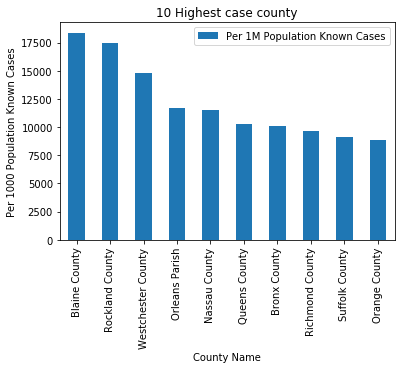

In [24]:
highest_merged = merged_confirm_pop.nlargest(10,['Per 1M Population Known Cases'])
highest_merged_graph = highest_merged.plot.bar(x='County Name',y='Per 1M Population Known Cases',title='10 Highest case county')
highest_merged_graph.set_ylabel("Per 1000 Population Known Cases")
highest_merged

## 10 counties with the smallest values

In [25]:
merged_confirm_pop.drop(merged_confirm_pop.loc[merged_confirm_pop['Per 1M Population Known Cases']==0].index, inplace=True)

,countyFIPS,County Name,State,population,Cases,Per 1M Population Known Cases
2673,48213,Henderson County,TX,82737,1,12.086491
2151,39145,Scioto County,OH,75314,1,13.277744
1199,23003,Aroostook County,ME,67055,1,14.913131
244,6103,Tehama County,CA,65084,1,15.364759
1074,21125,Laurel County,KY,60813,1,16.443852
1109,21195,Pike County,KY,57876,1,17.278319
2567,48001,Anderson County,TX,57735,1,17.320516
1058,21093,Hardin County,KY,110958,2,18.024838
247,6109,Tuolumne County,CA,54478,1,18.356034
2207,40079,Le Flore County,OK,49853,1,20.058973


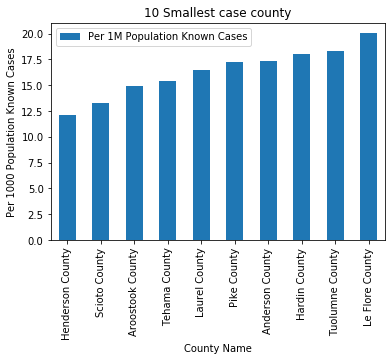

In [26]:
smallest_merged = merged_confirm_pop.nsmallest(10,['Per 1M Population Known Cases'])
smallest_merged_graph = smallest_merged.plot.bar(x='County Name',y='Per 1M Population Known Cases',title='10 Smallest case county')
smallest_merged_graph.set_ylabel("Per 1000 Population Known Cases")
smallest_merged

## 7. Compute the death rate (deaths/known cases) in each county that have both deaths and known cases.Compute the mean and standard deviation of the results.

Explanation: For death rate, first merged death data with confirmed cases data and then find out death rate with using formula(death count/ cases count). Here not considering case count = 0 and death count = 0 and then finding mean and standard deviation on data 

In [27]:
def deathCasesData(df_raw):
    df_cleaned = df_raw.melt(id_vars=['State','countyFIPS','County Name','stateFIPS'],value_name='Cases',var_name='Date')
    df_cleaned = df_cleaned.set_index(['State','countyFIPS','County Name','stateFIPS','Date'])
    return df_cleaned 

# Clean all datasets
death_cases_county = deathCasesData(covid_death_data)
death_cases_county

death_county_day = death_cases_county.groupby(['State','countyFIPS','County Name'])['Cases'].max().reset_index()
death_county_day = death_county_day.sort_values('State')
death_county_day.columns = ['State','countyFIPS','County Name','Death Count']
death_county_day

,State,countyFIPS,County Name,Death Count
0,AK,0,Statewide Unallocated,1.0
30,AK,2290,Yukon-Koyukuk Census Area,0.0
29,AK,2282,Yakutat City and Borough,0.0
28,AK,2275,Wrangell City and Borough,0.0
27,AK,2270,Wade Hampton Census Area,0.0
...,...,...,...,...
3172,WY,56001,Albany County,0.0
3171,WY,0,Statewide Unallocated,0.0
3193,WY,56043,Washakie County,0.0
3181,WY,56019,Johnson County,0.0


In [28]:
new_merged = pd.merge(confirm_county_day, death_county_day, how='inner', on=['countyFIPS', 'County Name','State'])
new_merged

,State,countyFIPS,County Name,Cases,Death Count
0,AK,0,Statewide Unallocated,6,1.0
1,AK,2290,Yukon-Koyukuk Census Area,1,0.0
2,AK,2282,Yakutat City and Borough,0,0.0
3,AK,2275,Wrangell City and Borough,0,0.0
4,AK,2270,Wade Hampton Census Area,0,0.0
...,...,...,...,...,...
3174,WY,56001,Albany County,4,0.0
3175,WY,0,Statewide Unallocated,0,0.0
3176,WY,56043,Washakie County,4,0.0
3177,WY,56019,Johnson County,8,0.0


In [29]:
new_merged.drop(new_merged.loc[new_merged['Cases']==0].index, inplace=True)
new_merged.drop(new_merged.loc[new_merged['Death Count']==0].index, inplace=True)
new_merged.drop(new_merged.loc[new_merged['Death Count'] > new_merged['Cases']].index, inplace=True)
new_merged

,State,countyFIPS,County Name,Cases,Death Count
0,AK,0,Statewide Unallocated,6,1.0
9,AK,2195,Petersburg Census Area,2,1.0
19,AK,2020,Municipality of Anchorage,88,3.0
27,AK,2110,City and Borough of Juneau,14,6.0
28,AK,2122,Kenai Peninsula Borough,13,1.0
...,...,...,...,...,...
3106,WV,54061,Monongalia County,53,1.0
3126,WV,54055,Mercer County,4,1.0
3148,WV,54049,Marion County,17,1.0
3149,WV,54035,Jackson County,16,1.0


In [30]:
new_merged['Death Rate %'] = (new_merged['Death Count'] / new_merged['Cases'])*100
new_merged.sort_values('State')

,State,countyFIPS,County Name,Cases,Death Count,Death Rate %
0,AK,0,Statewide Unallocated,6,1.0,16.666667
9,AK,2195,Petersburg Census Area,2,1.0,50.000000
19,AK,2020,Municipality of Anchorage,88,3.0,3.409091
27,AK,2110,City and Borough of Juneau,14,6.0,42.857143
28,AK,2122,Kenai Peninsula Borough,13,1.0,7.692308
...,...,...,...,...,...,...
3149,WV,54035,Jackson County,16,1.0,6.250000
3106,WV,54061,Monongalia County,53,1.0,1.886792
3126,WV,54055,Mercer County,4,1.0,25.000000
3148,WV,54049,Marion County,17,1.0,5.882353


In [31]:
mean_death_rate = new_merged["Death Rate %"].mean()  
std_death_rate = new_merged["Death Rate %"].std()  
print("Mean of Death Rate: " + str(mean_death_rate)+ "\n" +"Standard Deviation of Death Rate: "+ str(std_death_rate))

Mean of Death Rate: 8.15514288671779
Standard Deviation of Death Rate: 13.224007853476575


## 8. Produce a violin plot of the death rates found in 7

Explanation: For violin plot, ploting violin plot on death death rate from death and confirmed cases merged data

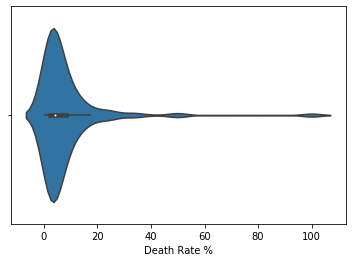

In [32]:
sns.violinplot(x=new_merged["Death Rate %"],inner='box')

## 9. There is some hope that covid-19 may have peaked in NYC (counties Bronx,Kings,New York, Queens and Richmond). Is there any evidence of that in the data?

Explanation: For NYC peak data, consider 5 counties and their per week confirmed cases data and per week new confirmed cases data to find out any evidence

In [33]:
def countyConfirmdata(df_raw):
    df_cleaned = df_raw.melt(id_vars=['State','countyFIPS','County Name','stateFIPS'],value_name='Cases',var_name='Date')
#     df_cleaned = df_cleaned.set_index(['countyFIPS','County Name','stateFIPS','Date'])
    return df_cleaned 

# Clean all datasets
all_county_data = countyConfirmdata(covid_confirmed_data)
county_data_nyc = all_county_data[all_county_data['State'] == 'NY']

county_data_nyc = county_data_nyc.groupby(['State','countyFIPS','County Name','Date'])['Cases'].max().reset_index()
county_data_nyc['Date'] = pd.to_datetime(county_data_nyc['Date'])
county_data_nyc = county_data_nyc.sort_values(['County Name','Date'])

county_name = list(['Queens County','Kings County','Bronx County','New York County','Richmond County'])
nyc_county = county_data_nyc[county_data_nyc['County Name'].isin(county_name)]

### NYC per week data

In [34]:
result_list_nyc = []

for countyname in county_name:
    df_result = nyc_county[county_data_nyc['County Name'] == countyname]
    result_list_nyc.append(df_result[5::7])

nyc_week_data = pd.concat(result_list_nyc,axis=0,ignore_index=True,sort=False)
nyc_week_data_change = nyc_week_data.pivot(index='Date',columns='County Name',values='Cases')
nyc_week_data_change

/Users/gaurikulkarni/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


County Name,Bronx County,Kings County,New York County,Queens County,Richmond County
Date,,,,,
2020-01-27,0,0,0,0,0
2020-02-03,0,0,0,0,0
2020-02-10,0,0,0,0,0
2020-02-17,0,0,0,0,0
2020-02-24,0,0,0,0,0
2020-03-02,0,0,1,0,0
2020-03-09,2,4,11,2,1
2020-03-16,34,62,111,118,19
2020-03-23,1829,3494,2572,3621,817


### New cases in NYC per week

In [35]:
result_new = []
for countyname in county_name:
    df_result = nyc_county[nyc_county['County Name'] == countyname]
    new_case_df = df_result[5::7]
    result_new.append(new_case_df['Cases'].diff().fillna(new_case_df['Cases']))
    
nyc_week_data['New cases'] = pd.concat(result_new,axis=0,ignore_index=True,sort=False)
nyc_week_data_new = nyc_week_data.pivot(index='Date',columns='County Name',values='New cases')
nyc_week_data_new

County Name,Bronx County,Kings County,New York County,Queens County,Richmond County
Date,,,,,
2020-01-27,0.0,0.0,0.0,0.0,0.0
2020-02-03,0.0,0.0,0.0,0.0,0.0
2020-02-10,0.0,0.0,0.0,0.0,0.0
2020-02-17,0.0,0.0,0.0,0.0,0.0
2020-02-24,0.0,0.0,0.0,0.0,0.0
2020-03-02,0.0,0.0,1.0,0.0,0.0
2020-03-09,2.0,4.0,10.0,2.0,1.0
2020-03-16,32.0,58.0,100.0,116.0,18.0
2020-03-23,1795.0,3432.0,2461.0,3503.0,798.0


### NYC cases count per week and new cases per week

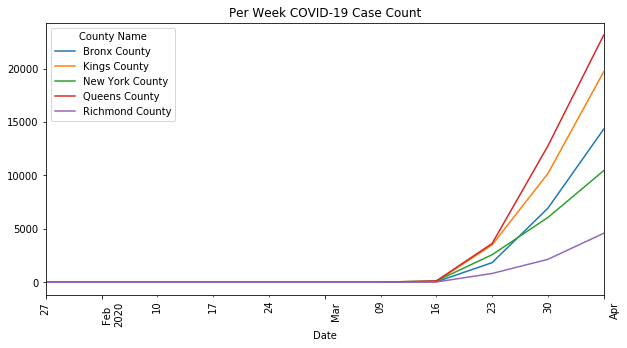

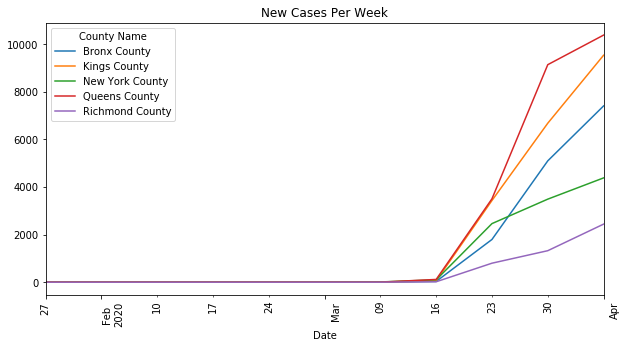

In [36]:
nyc_week_data_change.plot(kind='line',rot=90,figsize=(10,5),title='Per Week COVID-19 Case Count')
nyc_week_data_new.plot(kind='line',rot=90,figsize=(10,5),title='New Cases Per Week')

### Analysis: We can determine the highest point of the graph as its peak over time. As NYC county's data represented above does not show any flattening curve in both graphs, we can not say that it has reached its peak yet. 

##### What peak is? Referance: https://www.nytimes.com/2020/04/06/nyregion/coronavirus-new-york-peak.html 

## 10. Seattle (King county in Washington) also hopes that they have peaked. Is there any evi- dence of that in the data?

Explanation: For Seattle peak data, consider King county and their per week confirmed cases data and per week new confirmed cases data to find out any evidence

In [37]:
washing_data = all_county_data[all_county_data['State'] == 'WA']

county_data_wa = washing_data.groupby(['County Name','Date'])['Cases'].max().reset_index()
county_data_wa['Date'] = pd.to_datetime(county_data_wa['Date'])
county_data_wa = county_data_wa.sort_values(['County Name','Date'])

wa_king_county = county_data_wa.loc[county_data_wa['County Name'] == 'King County'] 
wa_king_county_week = wa_king_county[5::7]
wa_king_county_week = pd.DataFrame(wa_king_county_week).reset_index(drop=True)
wa_king_county_week.columns = ['County Name','Date','Per Week Cases']

wa_king_county_week['New Cases'] = wa_king_county_week['Per Week Cases'].diff().fillna(wa_king_county_week['Per Week Cases'])
wa_king_county_week

,County Name,Date,Per Week Cases,New Cases
0,King County,2020-01-27,1,1.0
1,King County,2020-02-03,1,0.0
2,King County,2020-02-10,1,0.0
3,King County,2020-02-17,1,0.0
4,King County,2020-02-24,1,0.0
5,King County,2020-03-02,14,13.0
6,King County,2020-03-09,116,102.0
7,King County,2020-03-16,488,372.0
8,King County,2020-03-23,1170,682.0
9,King County,2020-03-30,2330,1160.0


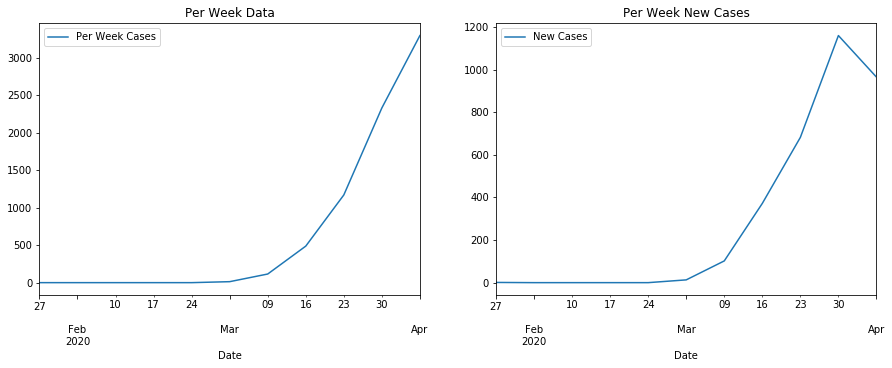

In [38]:
fig = plt.figure()

# Divide the figure into a 1x2 grid, and give me the first section
ax1 = fig.add_subplot(121)

# Divide the figure into a 1x2 grid, and give me the second section
ax2 = fig.add_subplot(122)

wa_king_county_week.plot(x='Date', y='Per Week Cases',title='Per Week Data', ax=ax1,figsize=(15,5))
wa_king_county_week.plot.line(x='Date',y='New Cases',title='Per Week New Cases', ax=ax2,figsize=(15,5))

plt.show()

### Analysis: The total number of new cases per week has decreased in the 11th (last) week than previous (10th) week, so here we can say that new cases have peaked. But we do not have any conclusive evidence that the total number of cases in King County in Washington has reached its peak as we still see high number of cases being reported. 

-------------------------------------------------------------------------------------------------------------------

## Names

### 1. Combine the files in to one data frame that contains year,name,sex and number of people born that year. Create a training set and a test set from this dataframe.

Explanation: For combine data merge all files from the folder and split it to train and test

In [39]:
data = pd.DataFrame() # initialize empty df

data_li = []

for filename in all_files:
    df = pd.read_csv(filename, names=['Name','Sex', 'Number']) # read in each csv to df
    df['Year'] = filename # add a column with the filename
    data_li.append(df) # append df in list
    
data = pd.concat(data_li,ignore_index=True,sort=False)
data['Year'] = data['Year'].str.extract('(\d{4})',expand=True)
data.Sex.replace({'F':0,'M':1},inplace=True)
data = data.sort_values('Year')

In [40]:
data.head()

,Name,Sex,Number,Year
1841825,Abbott,1,5,1880
1840482,Lenore,0,12,1880
1840483,Liddie,0,12,1880
1840484,Lotta,0,12,1880
1840485,Mame,0,12,1880


In [41]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

cv = CountVectorizer(analyzer='char',ngram_range=(3,4))
Xfeatures = data['Name']
X = cv.fit_transform(Xfeatures)
y = data.Sex

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

### 2. For the first model determine for each name which sex used the name most in the training data. How good is the model on the test set? How to measure good?

In [42]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_train,y_train)
lr.predict(X_test)

/Users/gaurikulkarni/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0, 0, 0, ..., 1, 0, 0])

In [43]:
lr.score(X_train,y_train)

0.8882491115144674

#### The above score is for Logistic Regression Model repeseing its Logistic probability

### Plotting confusion matrix for Logistic Regression 

In [44]:
y_pred = lr.predict(X_test)

In [45]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[343523,  38561],
       [ 35453, 228289]])

#### How to measure good?
We can measure a good model by plotting confusion matrix.The confusion matrix above can show most of the elemets lying in the prime diagonal true positive and true negative while the other two showing false positive and false negative

In [46]:
def genderPredictionLR(x):
    str(x)
    new = cv.transform([x])
    y_pred = lr.predict(new)
    if (y_pred == 1):
        print(x + " is most likely a male name!")
    else:
        print(x + " is most likely a female name!")

In [47]:
namelist = ['Gauri','Yang','Mark','Naya']
for i in namelist:
    print(genderPredictionLR(i))

Gauri is most likely a female name!
None
Yang is most likely a male name!
None
Mark is most likely a male name!
None
Naya is most likely a female name!
None


### 3. For the second model create a decision tree using the training data.How good is the model on the test set?

In [48]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy')

clf.fit(X_train,y_train)
clf.predict(X_train)

array([1, 1, 1, ..., 0, 1, 0])

In [49]:
clf.score(X_train,y_train)

0.9055719101294977

#### The above score is for Decision Tree Model representing the mean accuracy on the given test data and labels

In [50]:
y_predDT = clf.predict(X_test)

In [51]:
cnf_matrixDT = metrics.confusion_matrix(y_test, y_predDT)
cnf_matrixDT

array([[345802,  36282],
       [ 29171, 234571]])

#### How to measure good?
We can measure a good model by plotting confusion matrix.The confusion matrix above can show most of the elemets lying in the prime diagonal true positive and true negative while the other two showing false positive and false negative

In [52]:
def genderPredictionDT(x):
    str(x)
    new = cv.transform([x])
    y_pred = clf.predict(new)
    if (y_pred == 1):
        print(x + " is most likely a male name!")
    else:
        print(x + " is most likely a female name!")

In [53]:
namelistDT = ['Gauri','Yang','Mark','Naya']
for i in namelistDT:
    print(genderPredictionDT(i))

Gauri is most likely a female name!
None
Yang is most likely a male name!
None
Mark is most likely a male name!
None
Naya is most likely a female name!
None


### 4. How do the two models compare?
#### On comparing the scores, we can see that the Decision Tree model performed better on the current dataset but this might not be the case always. Even we can check confusion matrix to measure how the model is good. And to check both the models with different names as input, they can predicting gender for the given names. 